In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2D Arrays
Indexing and slicing 2D or even 3D arrays follows a silimar pattern.

In [2]:
a = np.arange(9).reshape(3, 3)
print("Shape of array:", a.shape)
a

Shape of array: (3, 3)


array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### Indexing syntax: 
`array[row, column]`

In [3]:
# First row of array
a[0]

array([0, 1, 2])

In [4]:
# Last row of array
a[-1]

array([6, 7, 8])

Code below same as `a[1][2]`, but this is a more convenient and elegant way of indexing

In [5]:
# row 1, col 2
a[1, 2]

5

### Slicing syntax: 
`array[fromRow : toRow, fromCol : toCol]`

In [6]:
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [7]:
# row 0-1, col 2
a[0:2, 2]

array([2, 5])

In [8]:
# Last row, col 0-1
a[-1, 0:2]

array([6, 7])

In [9]:
# All rows, col 1-2
a[:, 1:3]

array([[1, 2],
       [4, 5],
       [7, 8]])

Remeber we can also specify `step` while slicing.

Full __syntax__: `array[rStart : rStop : rStep, cStart : cStop : rctep]`

Lets make a new array to demonstate the role of the `step`

In [10]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [11]:
# All rows, columns 0, 0+2, 0+2+2...
a[::, ::2]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [12]:
# Rows 0, 0+2, 0+2+2..., all columns
a[::2, ::]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

Negative step reverses the order

In [13]:
# Reverse row order
a[::-1,:]

array([[ 8,  9, 10, 11],
       [ 4,  5,  6,  7],
       [ 0,  1,  2,  3]])

In [14]:
# Reverse column order
a[::, ::-1]

array([[ 3,  2,  1,  0],
       [ 7,  6,  5,  4],
       [11, 10,  9,  8]])

In [15]:
# Reverse both rows and columns
a[::-1, ::-1]

array([[11, 10,  9,  8],
       [ 7,  6,  5,  4],
       [ 3,  2,  1,  0]])

### Transposing arrays
Just like matrix transpose, the transpose of an array is the same array with the number of rows and columns swapped.

We can access the __Transponse__ of an array calling its `T` attribute as `array.T`.

In [16]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [17]:
a.T

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

### Boolean arrays and conditional slicing
`array > number` returns an array of booleans showing for which values the _condition_ is True and for which it is False.

In [18]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [19]:
a > 4

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]])

We can see that the values are False for all numbers which are less than or equal to 4 and True for all numbers which are greater than 4.

If we want to show the numbers for which this _condition_ is True then the syntax is: `array[condition]`

In [20]:
a[a > 4]

array([ 5,  6,  7,  8,  9, 10, 11])

Now lets set the cells that match out condition to a value

In [21]:
a[a > 4] = 666
a

array([[  0,   1,   2,   3],
       [  4, 666, 666, 666],
       [666, 666, 666, 666]])

Nice! Now lets select and change the numbers in a more useful way

In [22]:
a[a > 4] = np.linspace(0, 4, a[a > 4].size)
a

array([[0, 1, 2, 3],
       [4, 0, 0, 1],
       [2, 2, 3, 4]])

In this case we _selected_ the numbers in `a[a > 4]` and set them equal to some generated numbers between 0-4.

In other words, we turned the numbers greater than 4 to numbers less than 4.

__Note__: When we assigned a slice of an array to a value, the original array is changed.

> If we want to instead just copy the array values the we can do it this way:

In [23]:
# Making a new array
a = np.arange(1, 13).reshape(3, 4)
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [ ]:
# Lets copy the bottom right part of the array (row 1-2, col 0-2)
aslice = a[1:3, 0:3].copy()
aslice

array([[ 5,  6,  7],
       [ 9, 10, 11]])

In [ ]:
# Now lets set this slice to some values
aslice = np.arange(50, 57)
aslice

array([50, 51, 52, 53, 54, 55, 56])

In [ ]:
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

As we can see, unlike before, the original array `a` is unchanged.


### Random number arrays and normal distributions
Numpy provides a few very userful random number generators. 

#### `np.random.random`

Calling it without any arguments it returns a random float between 0-1.

In [ ]:
np.random.random()

0.6904109727722639

Calling it with a number will return an array of that many random numbers (between 0-1)

In [ ]:
np.random.random(10)

array([0.08930884, 0.09185577, 0.60114036, 0.67874272, 0.77289344,
       0.22689131, 0.87011542, 0.28039723, 0.73993874, 0.18433865])

Calling it with a tuple of rows, columns will return a random array of that shape.

In [ ]:
np.random.random((4, 5))

array([[0.22663088, 0.40424995, 0.66142996, 0.83323737, 0.56372884],
       [0.20579048, 0.85324702, 0.5649454 , 0.32691879, 0.06706212],
       [0.16312328, 0.62336351, 0.24724017, 0.868972  , 0.89094962],
       [0.75743404, 0.99186417, 0.22759535, 0.81190643, 0.04783921]])

#### `np.random.randint`

Just like floats we can generate random int arrays. However the `randint` function can't be called without arguments. 

It take a required argument for the ___high___ value of the range.

In [ ]:
# Int between 0 - 5 (low-high)
np.random.randint(5)

3

Specifying both ___low___ and ___high___

In [ ]:
# Int between 55-100
np.random.randint(55, 100)

96

Specifying ___size___ along with the ___range___

In [ ]:
# 100 ints between 0-5
np.random.randint(0, 5, size=100)

array([2, 2, 3, 0, 0, 0, 1, 2, 3, 2, 2, 3, 4, 0, 3, 0, 2, 3, 2, 2, 3, 2,
       1, 0, 0, 3, 4, 0, 0, 2, 3, 4, 0, 4, 3, 3, 3, 1, 1, 1, 4, 0, 0, 4,
       2, 0, 3, 2, 4, 4, 2, 3, 0, 2, 0, 3, 0, 1, 3, 0, 3, 2, 1, 1, 4, 1,
       4, 1, 2, 2, 1, 4, 3, 3, 3, 3, 3, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2,
       1, 4, 1, 4, 2, 4, 3, 2, 0, 1, 2, 1])

__`np.random`__ has several random number generating functions like `random`:

### Uniform Distributions
`random_sample()`, `ranf()` and `sample()` do exactly the same thing. Just like `random`, they all return random floats in the half-open interval [0.0, 1.0). Results are from the “continuous uniform” distribution over the stated interval. A uniform distribution is where all the datapoints have an equal likelihood of being selected.

Lets demonstrate this by making a histogram of the random numbers we generate. Lets add in a KDE line to smooth out the distribution

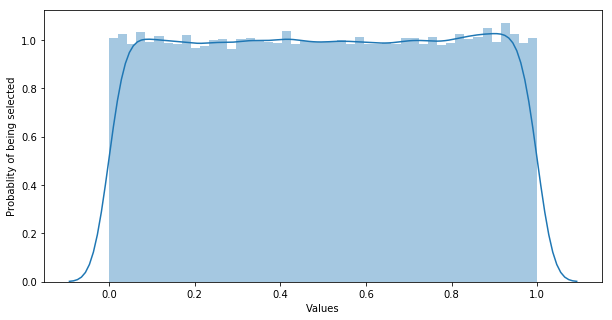

In [ ]:
# Generating 100,000 random numbers between 0-1
data = np.random.random(100000)

# Plotting
plt.figure(figsize=(10, 5))
plt.xlabel("Values")
plt.ylabel("Probablity of being selected")
sns.distplot(a=data)

As we can see the majority of the values had a probablity of being selected = 1. The KDE line was a rough estimate of the distribution. However, a true ___uniform distribution___ would have a horizontal line along the y=1.

### Normal Disributions
___Normal distributions___ are very common in nature. But unlike ___Uniform disributions___ they are not flat. They have a bell like shape, which is why they are also refered to as _bell curves_. They exhibit central tendency, which is that most of the data points are located around the center of the distribution.

We can make normally disributed random numbers with:
#### `np.random.normal`
Without any arguments, it returns a random float from a distribution where the *mean = 0* and the *standard deviation (SD) = 1*.

In [ ]:
np.random.normal()

-0.3986730625217076

We can specify the `loc`(__mean__), `scale`(__SD__) and `size`(__shape__) of the array.

In [ ]:
# Mean = 27, SD = 5, (10 rows, 5 cols)
np.random.normal(27, 5, (10 ,5))

array([[35.82840401, 28.66907207, 32.64408586, 23.56419665, 27.4689579 ],
       [27.68037212, 31.02039629, 30.9743695 , 29.20920009, 30.36176407],
       [31.02057505, 29.77122651, 40.93903858, 24.04845974, 36.60849524],
       [32.3551208 , 36.13840326, 29.31490367, 25.4241003 , 27.96134524],
       [21.76621056, 30.99854199, 31.82796153, 28.87000948, 27.0126934 ],
       [28.50913601, 19.21261263, 21.72636751, 20.83014927, 26.44028344],
       [27.05485611, 23.69883714, 32.94237932, 24.26192744, 24.81552353],
       [19.78837126, 21.44678441, 32.04414177, 25.945356  , 32.2085617 ],
       [21.60786923, 26.49766652, 29.19277309, 32.27978782, 22.54293971],
       [16.99256163, 24.13331476, 33.76497449, 27.05909354, 29.4036577 ]])

Now lets see what a normal distribution looks like. For that lets generate a large sample of normally distributed random numbers.

In [ ]:
data = np.random.normal(size=100000)
print("Number of values:", data.size)
print('Mean :', data.mean())
print('SD :', data.std())
data

Number of values: 100000
Mean : -0.0026551117913123333
SD : 1.0016844404628176


array([-0.04652439,  1.04556873, -0.49400676, ...,  0.79206358,
       -0.01401027, -0.51198896])

In [ ]:
plt.figure(figsize=(10, 5))
plt.xlabel("Values")
plt.ylabel("Probablity of being selected")
sns.distplot(a=data)

As we can see in a ___normal distribution___ not all values have the same likelihood of being selected. Infact the values near the mean have the highest likelihood. As we move away to values far from the mean the likelihood of being selected falls.

For more details on ___other distributions___ and more on ___random sampling___ using Numpy visit: [Random sampling: numpy.random docs](https://docs.scipy.org/doc/numpy/reference/routines.random.html) (_Check Distributions_)

### Summary of random number generator functions
- Random int or int array: __`randint`__ / `random_integers` (depricated!)


- Random float or float array (uniform dist): __`random`__ / `rand` / `ranf` / `random_sample` / `sample`


- Random float or float array (normal dist): __`normal`__ / `randn`